In [64]:
import pandas as pd
df = pd.read_csv("news_popularity.csv")
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [65]:
#Size of dataset before cleaning.

df.shape

(39644, 61)

In [66]:
#Cleaning dataset and reporting size of new dataset.

df = df.drop(df.columns[[0, 1]], axis=1)

df.shape

(39644, 59)

In [ ]:
# Confirming that non-predictive columns were droppped.
list(df.columns.values)

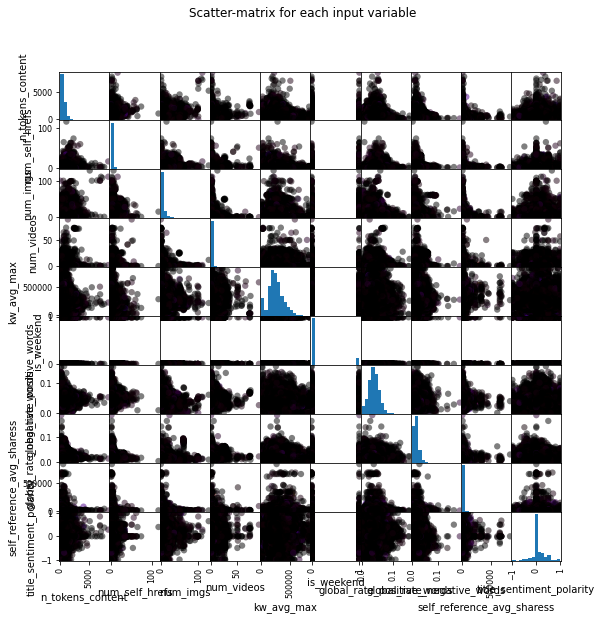

In [68]:
#Creating scatter matrix for an optional subset of numerical attributes.

from pandas.plotting import scatter_matrix
from matplotlib import cm
import matplotlib.pyplot as plt
feature_names = ['n_tokens_content', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_avg_max',
                 'is_weekend', 'global_rate_positive_words', 'global_rate_negative_words', 'self_reference_avg_sharess', 
                 'title_sentiment_polarity']

X = df[feature_names]
y = df['shares']

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('shares_scatter_matrix')

In [70]:
#Splitting the dataset into training set and test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
#Train k-NN for k=3.

import timeit

start = timeit.default_timer()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set for k=3: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set for k=3: {:.2f}'
     .format(knn.score(X_test, y_test)))

stop = timeit.default_timer()

print('Time: ', stop - start)

Accuracy of K-NN classifier on training set for k=3: 0.34
Accuracy of K-NN classifier on test set for k=3: 0.01
Time:  5.556384031999187


In [72]:
#Train k-NN for k=5.

import timeit

start = timeit.default_timer()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set for k=5: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set for k=5: {:.2f}'
     .format(knn.score(X_test, y_test)))

stop = timeit.default_timer()

print('Time: ', stop - start)

Accuracy of K-NN classifier on training set for k=5: 0.23
Accuracy of K-NN classifier on test set for k=5: 0.01
Time:  6.103074648999609


In [73]:
#Train k-NN for k=7.

import timeit

start = timeit.default_timer()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set for k=7: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set for k=7: {:.2f}'
     .format(knn.score(X_test, y_test)))

stop = timeit.default_timer()

print('Time: ', stop - start)

Accuracy of K-NN classifier on training set for k=7: 0.18
Accuracy of K-NN classifier on test set for k=7: 0.02
Time:  6.551848279999831


In [74]:
#Train k-NN for k=9.

import timeit

start = timeit.default_timer()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set for k=9: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set for k=9: {:.2f}'
     .format(knn.score(X_test, y_test)))

stop = timeit.default_timer()

print('Time: ', stop - start)

Accuracy of K-NN classifier on training set for k=9: 0.16
Accuracy of K-NN classifier on test set for k=9: 0.02
Time:  6.901355981000961


In [76]:
#Train k-NN for k=11.

import timeit

start = timeit.default_timer()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set for k=11: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set for k=11: {:.2f}'
     .format(knn.score(X_test, y_test)))

stop = timeit.default_timer()

print('Time: ', stop - start)

Accuracy of K-NN classifier on training set for k=11: 0.15
Accuracy of K-NN classifier on test set for k=11: 0.02
Time:  6.987131760000921


In [77]:
#Train SVM.

import timeit

start = timeit.default_timer()

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

stop = timeit.default_timer()

print('Time: ', stop - start) 

Accuracy of SVM classifier on training set: 0.06
Accuracy of SVM classifier on test set: 0.06
Time:  3294.3879454120015


In [79]:
#Train decision tree.

import timeit

start = timeit.default_timer()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

stop = timeit.default_timer()

print('Time: ', stop - start) 

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.02
Time:  8.356583085998864
